In [37]:
import full_model
import fast_model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from joblib import Parallel, delayed

In [38]:
def generate_and_find_inf(num_nodes, steps, num_influencers=0):

    G = nx.barabasi_albert_graph(num_nodes, 2)

    model_inf = fast_model.InfluenceDeinfluenceModel(G)
    model_inf.set_initial_states()
    initial_influencers = model_inf.greedy_hill_climbing(num_influencers, steps)

    #initial_influencers = model_inf.greedy_hill_climbing_new(num_influencers)
    print("Optimized Initial Influencers:", initial_influencers)

    return model_inf, initial_influencers

In [39]:
# Example usage
num_nodes = 200
inf_steps = 10
num_influencers = 10

results = generate_and_find_inf(num_nodes, inf_steps, num_influencers=num_influencers)

(model_inf, optimized_influencers) = results

#print("count influence", model.evaluate_influence())

Optimized Initial Influencers: {130, 6, 8, 9, 173, 110, 47, 175, 143, 150}


Optimized Influencers: {130, 6, 8, 9, 173, 110, 47, 175, 143, 150}
Optimized Deinfluencers: {72, 8, 6}


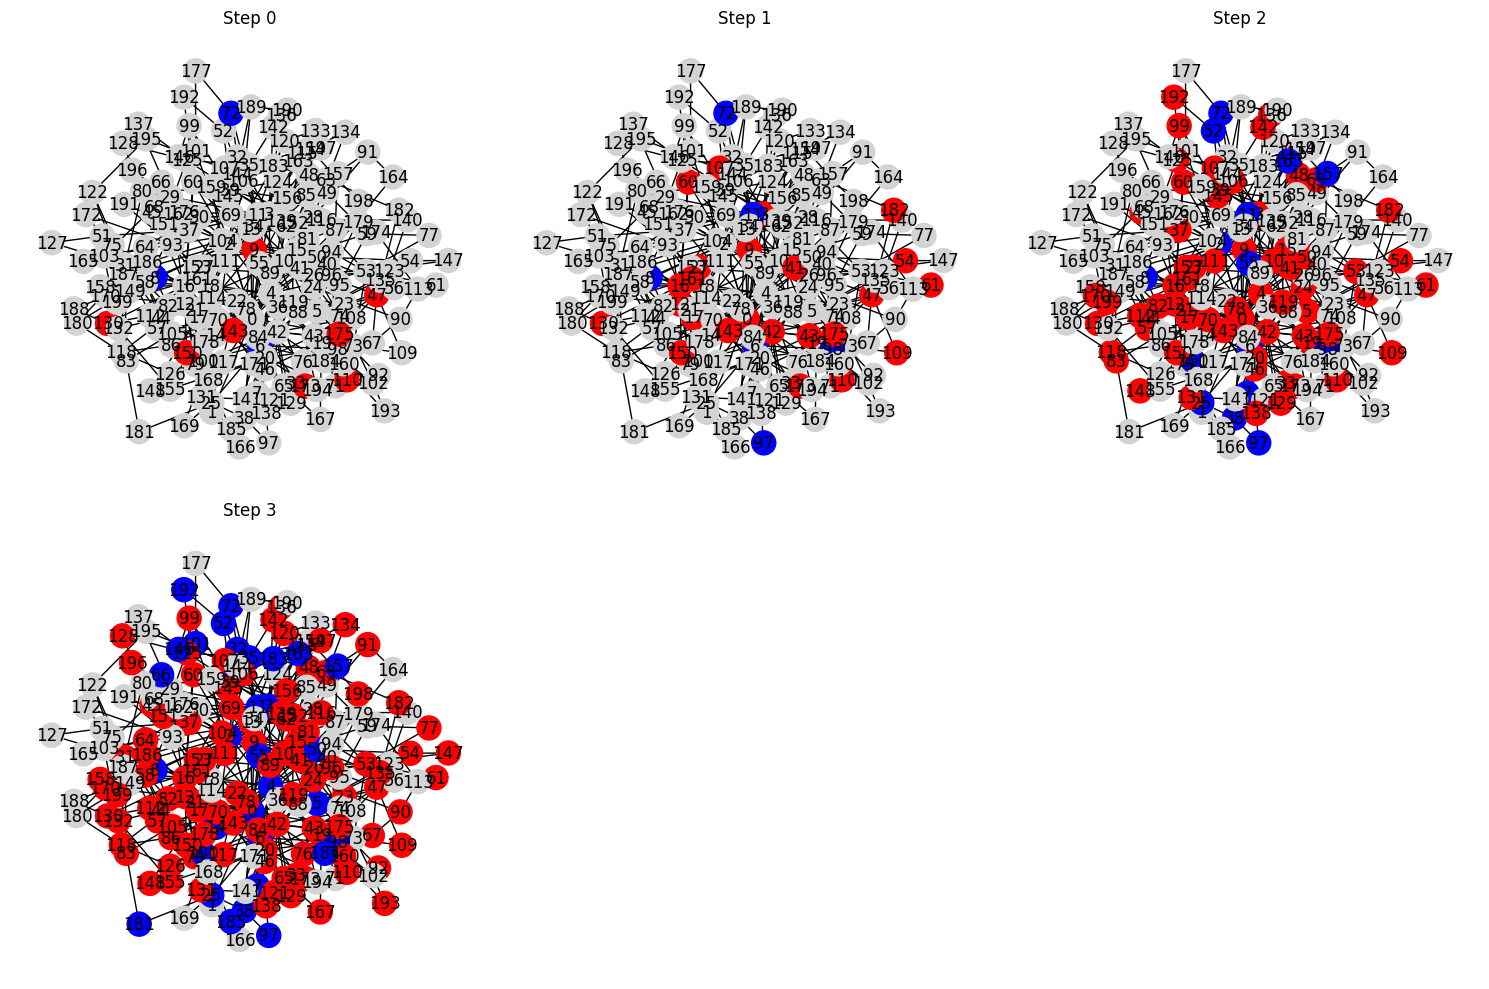

count deinfuence 32


In [40]:
deinf_steps = 3
deinf_num = 3

model = full_model.InfluenceDeinfluenceModel(model_inf.graph)
model.history = []
print("Optimized Influencers:", optimized_influencers)

model.set_initial_states()
deinfluencers = model.greedy_hill_climbing_deinf(deinf_num, 20)
print("Optimized Deinfluencers:", deinfluencers)

model.reset_graph()
model.set_influencers(optimized_influencers)
model.set_deinfluencers(deinfluencers)
model.run_cascade(deinf_steps)
model.display_graphs_grid()

print("count deinfuence",model.count_deinfluenced())

In [41]:
# Function to run the cascade and count deinfluenced nodes
def count_deinfluenced(model, inf, deinf, num_runs, steps):
    total_deinfluenced = 0
    for run in range(num_runs):
        model.reset_graph()
        model.set_influencers(inf)
        model.set_deinfluencers(deinf)
        model.run_cascade(steps)
        #print(model.history)
        deinfluenced_count = model.count_deinfluenced()
        #print(deinfluenced_count)
        #print(f"Run {run+1}/{num_runs}: {deinfluenced_count} nodes deinfluenced")
        total_deinfluenced += deinfluenced_count
        #print(f"Total deinfluenced nodes: {total_deinfluenced}")
        model.reset_graph()
        
    average_deinfluenced = total_deinfluenced / num_runs
    #print(f"Average deinfluenced nodes: {average_deinfluenced}")

    return average_deinfluenced

# Initialize the model
model.reset_graph()

# Rank nodes using different centrality measures
k_deinfluencers = 3

degree_centrality_ranking = model.select_deinfluencers_degree_centrality(k_deinfluencers)
closeness_centrality_ranking = model.select_deinfluencers_closeness_centrality(k_deinfluencers)
betweenness_centrality_ranking = model.select_deinfluencers_betweenness_centrality(k_deinfluencers)
eigenvector_centrality_ranking = model.select_deinfluencers_eigenvector_centrality(k_deinfluencers, max_iter=1000, tol=1e-06)
pagerank_centrality_ranking = model.select_deinfluencers_pagerank_centrality(k_deinfluencers)
random_deinfluencers = model.select_deinfluencers_random(k_deinfluencers)
optimized_deinfluencers = model.greedy_hill_climbing_deinf(k_deinfluencers, 5, 10)
deinfleucers_from_influencers = model.select_deinfluencers_from_influencers(k_deinfluencers)

print("Optimized Deinfluencers:", optimized_deinfluencers)
print("Deinfluencers from Influencers:", deinfleucers_from_influencers)

print("Degree Centrality Ranking:", degree_centrality_ranking)
print("Closeness Centrality Ranking:", closeness_centrality_ranking)
print("Betweenness Centrality Ranking:", betweenness_centrality_ranking)
print("Eigenvector Centrality Ranking:", eigenvector_centrality_ranking)
print("PageRank Centrality Ranking:", pagerank_centrality_ranking)
print("Random Deinfluencers:", random_deinfluencers)


# Run cascades and count deinfluenced nodes for each centrality measure
num_runs = 10  # Number of times to run the cascade for averaging
steps = 3  # Number of steps to run the cascade

results = {
    'Degree': count_deinfluenced(model, optimized_influencers, degree_centrality_ranking, num_runs, steps),
    'Closeness': count_deinfluenced(model, optimized_influencers, closeness_centrality_ranking, num_runs, steps),
    'Betweenness': count_deinfluenced(model, optimized_influencers, betweenness_centrality_ranking, num_runs, steps),
    'Eigenvector': count_deinfluenced(model, optimized_influencers, eigenvector_centrality_ranking, num_runs, steps),
    'PageRank': count_deinfluenced(model, optimized_influencers, pagerank_centrality_ranking, num_runs, steps),
    'random': count_deinfluenced(model, optimized_influencers, random_deinfluencers, num_runs, steps),
    'hill_climbing': count_deinfluenced(model, optimized_influencers, optimized_deinfluencers, num_runs, steps),
    'from_influencers': count_deinfluenced(model, optimized_influencers, deinfleucers_from_influencers, num_runs, steps)
}

# Print the results
for centrality, count in results.items():
    print(f"{centrality}: {count:.2f} nodes deinfluenced on average")

# Plot the results
plt.figure(figsize=(12, 6))  # Increase the figure size
plt.bar(results.keys(), results.values(), color=['red', 'blue', 'green', 'purple', 'orange'])
plt.xlabel('Centrality Measure')
plt.ylabel('Average Number of Deinfluenced Nodes')
plt.title('Comparison of Average Final Deinfluenced Nodes by Centrality Measure')
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/huberyhu/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/m4/rndkh84x7l7_zhb99lhzjcqw0000gn/T/ipykernel_16604/3515452341.py", line 35, in <module>
    deinfleucers_from_influencers = model.select_deinfluencers_from_influencers(optimized_influencers, k_deinfluencers)
                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/huberyhu/Desktop/SURP/im_deinfluence/full_model.py", line 334, in select_deinfluencers_from_influencers
  File "/Users/huberyhu/Desktop/SURP/im_deinfluence/full_model.py", line 189, in greedy_hill_climbing
    for _ in range(k):
             ^^^^^^^^
TypeError: 'set' object cannot be interpreted as an integer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  F

Aggregated Results: [82.6, 82.9, 82.4, 84.4, 82.9, 83.0, 83.4, 83.3, 84.4, 84.3]


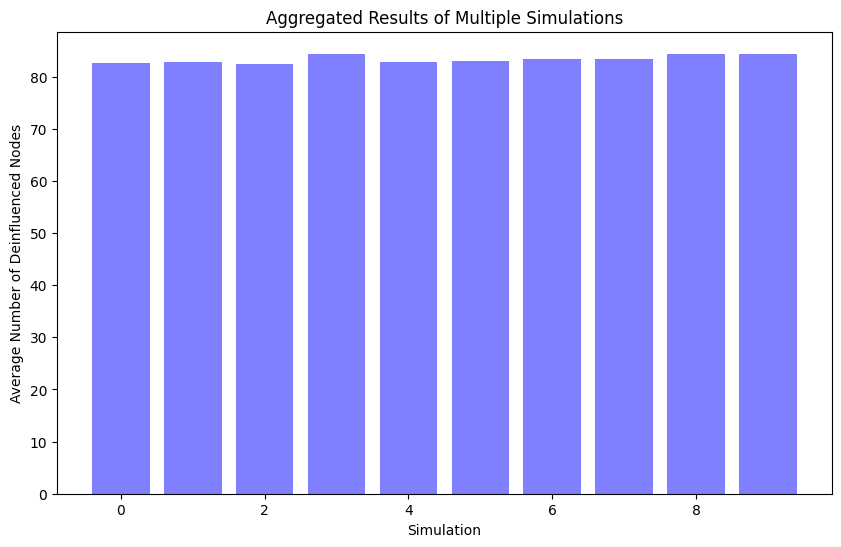

In [ ]:

# # Initialize an empty dictionary to store the aggregated results
# aggregated_results = []

# # Run the simulation k times
# for i in range(10):
#     # Reset the graph and set the influencers
#     model.reset_graph()
#     model.set_influencers(optimized_influencers)
    
#     # Run the cascade and count deinfluenced nodes
#     result = count_deinfluenced(model, optimized_influencers, degree_centrality_ranking, num_runs, steps)
    
#     # Store the result in the aggregated_results dictionary
#     aggregated_results.append(result)

# print("Aggregated Results:", aggregated_results)

# # Plot the aggregated results

# plt.figure(figsize=(10, 6))  # Increase the figure size
# for i, result in enumerate(aggregated_results):
#     plt.bar(i, result, color='blue', alpha=0.5)
# plt.xlabel('Simulation')
# plt.ylabel('Average Number of Deinfluenced Nodes')
# plt.title('Aggregated Results of Multiple Simulations')
# plt.show()